In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Programming for Physics
<hr style="height: 2px; border-width: 0; color: gray; background-color: gray;" />

   &emsp;&emsp;&emsp;&emsp; __Lecture 22__ &mdash; Topic II: Optimization and Equation solving
   

   
  
   


# Today's Plan

- Recap

- Continuing Topic: Optimization and Equation Solving

## Optimization and Equation Solving

## The physics of beach lifeguard, dog and light
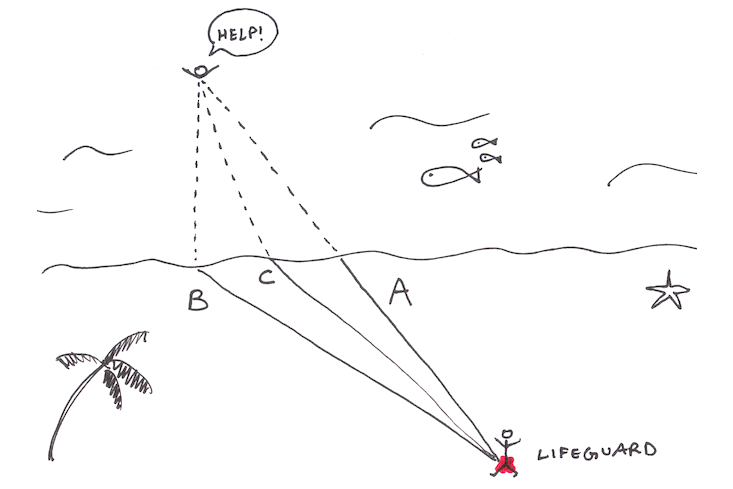


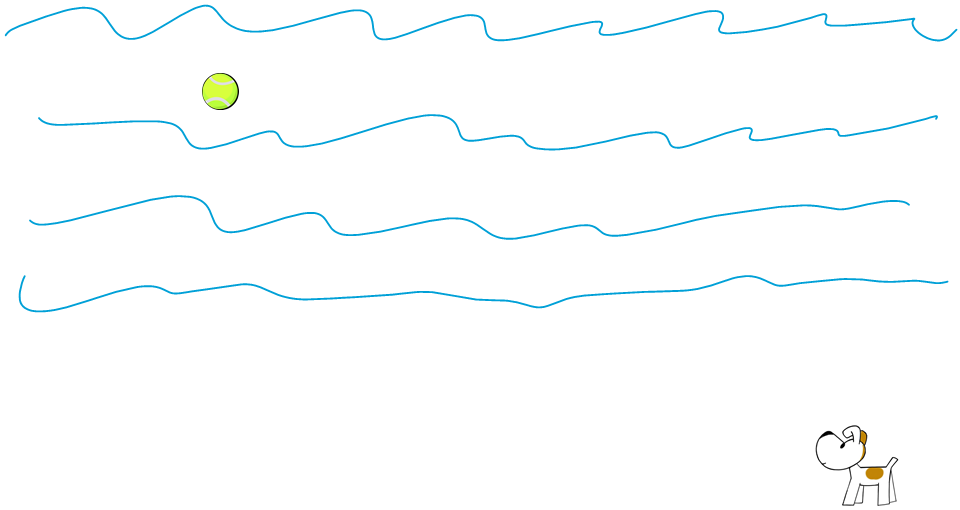

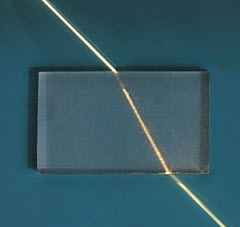

## How to find best x
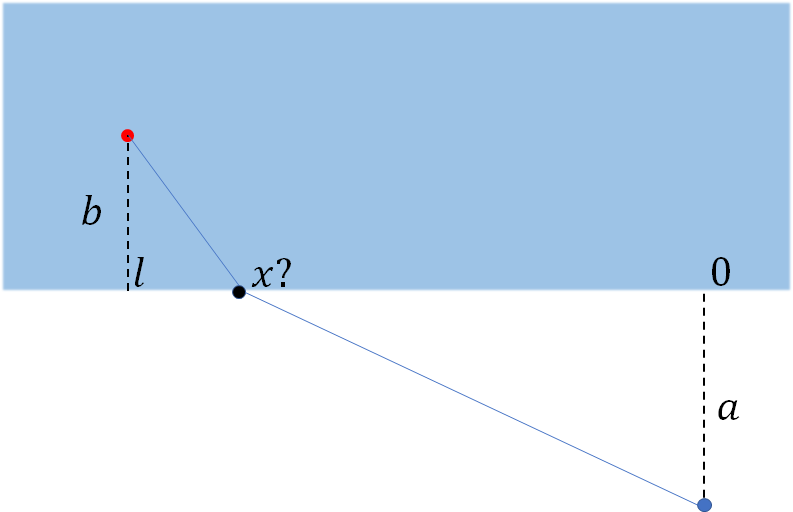
The speed of running is $v_{run}$

The speed of swimming is $v_{swim}$

## Method
step1. Make a function $t(x)$ and its derivative $t'(x)$

step2. Find the best x that __minimize__ $t(x)$

    - directly minimize $t(x)$
        - gradient descend
        - using package scipy.optimize.minimize
        
    - get the derivative t'(x) and solve t'(x)==0
        - Newton iteration
        - using package sympy.solve
        - using package function scipy.optimize.root

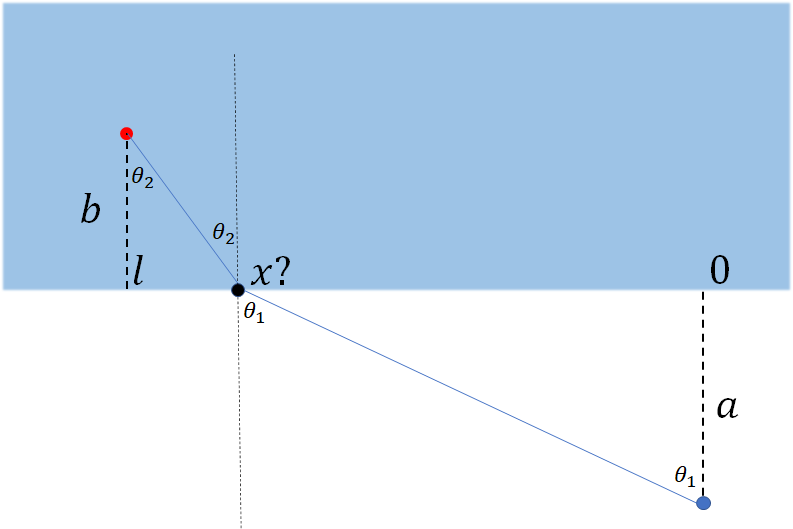

$r_{run} =\sqrt{a^2 + x^2}$

$r_{swim} =\sqrt{b^2 + (l-x)^2}$

$t = r_{run}/v_{run} + r_{swim}/v_{swim}$ 

$t(x) = \frac{1}{v_{run}}\sqrt{a^2 + x^2} + \frac{1}{v_{swim}}\sqrt{b^2 + (l-x)^2}$


In [2]:
def total_time(x):  ##t(x)
    r_run = (a**2 + x**2)**0.5
    r_swim = (b**2 + (l-x)**2)**0.5
    t_run = r_run/v_run
    t_swim = r_swim/v_swim
    t = t_run + t_swim
    return t

In [3]:
l = 100 #m
v_run = 6 #m/s
v_swim = 4  #m/s
a = 10 #m ;
b = 20 #m

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'total time')

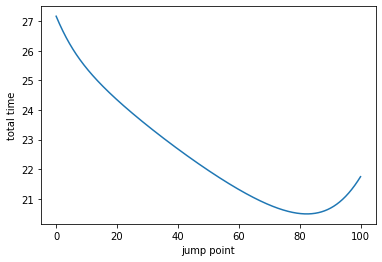

In [5]:
#visualize the function
x = np.linspace(0,l,1000)#an array of 1000 points between 0 and l
plt.plot(x,total_time(x))
plt.xlabel('jump point')
plt.ylabel('total time')

## use package

In [6]:
import scipy.optimize
result = scipy.optimize.minimize(total_time,20)
result

      fun: 20.494418451586874
 hess_inv: array([[195.20073604]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([82.34466061])

In [7]:
result=scipy.optimize.minimize(lambda x:x**4+x**2-x,6)
result

      fun: -0.21480474685283224
 hess_inv: array([[0.26365323]])
      jac: array([5.0291419e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([0.38545862])

$r_{run} =\sqrt{a^2 + x^2}$

$r_{swim} =\sqrt{b^2 + (l-x)^2}$

$t = r_{run}/v_{run} + r_{swim}/v_{swim}$ 

$t(x) = \frac{1}{v_{run}}\sqrt{a^2 + x^2} + \frac{1}{v_{swim}}\sqrt{b^2 + (l-x)^2}$

$$t'(x) = \frac{x}{v_{run}r_{run}} + \frac{x-l}{v_{swim}r_{swim}}$$

In [8]:
def d_total_time(x): ##t'(x)
    r_run = (a**2 + x**2)**0.5
    r_swim = (b**2 + (l-x)**2)**0.5
    dt = 1/v_run*x/r_run + 1/v_swim*(x-l)/r_swim
    return dt

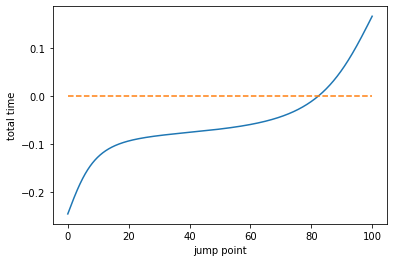

In [9]:
#visualize the function
x = np.linspace(0,l,1000)#an array of 1000 points between 0 and l
plt.plot(x,d_total_time(x))
plt.xlabel('jump point')
plt.ylabel('total time')
plt.plot([0,100],[0,0],'--') #plt.plot([x1,x2],[y1,y2])

## Gradient Descend
Walking in a foggy hill
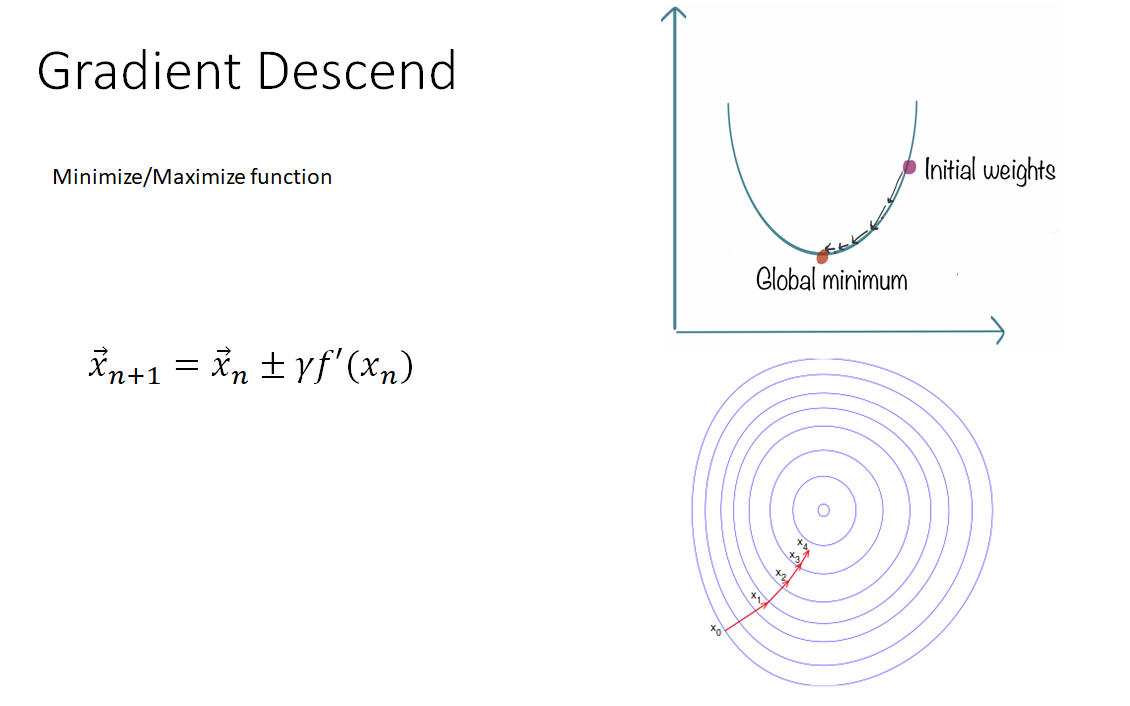

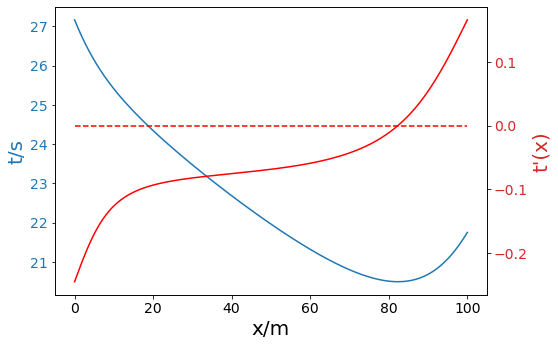

1. Picking an starting point $x_0$:
2. starting the iteration (go down the hill)

\begin{equation}
x_{n+1} = x_{n} - \gamma f'(x_n)
\end{equation}

3. stopping the iteration when $x_{n+1} \approx x_{n}$

In [10]:
def gradient_descend(df, x):
    x_list=[x]
    while True:
        x_new = x - 50*df(x)
        x_list.append(x_new)
        
        if abs(x_new -x)<1e-5:
            return x_list
        x = x_new

In [11]:
x_list = gradient_descend(d_total_time, 10)
print(x_list)

[10, 16.309781742411513, 21.36314518449458, 25.930085576819607, 30.222727718723828, 34.32737283337136, 38.284392315723565, 42.1127545755093, 45.819587526479665, 49.40446334017852, 52.86150215913675, 56.18050339712156, 59.34767330797341, 62.346282067034004, 65.15749330974664, 67.76155924023786, 70.13950287724448, 72.27527125000437, 74.15812769261161, 75.78481227965761, 77.1608673186907, 78.30064020849196, 79.22585890004103, 79.96315215110056, 80.54119430548128, 80.98814647608094, 81.3298112534846, 81.58860318421371, 81.78321139706108, 81.92873715808166, 82.03709476524372, 82.11751611930089, 82.17705842542806, 82.22106216276654, 82.25353837489007, 82.27748282859706, 82.2951237658742, 82.30811348832046, 82.3176744616826, 82.32470963211932, 82.32988512340062, 82.3336919069589, 82.336491616705, 82.33855049054436, 82.34006446461004, 82.34117769876593, 82.34199623790413, 82.3425980781537, 82.34304057971801, 82.34336592339005, 82.34360512576421, 82.3437809931666, 82.34391029444423, 82.34400535

Text(0, 0.5, '$x_n$')

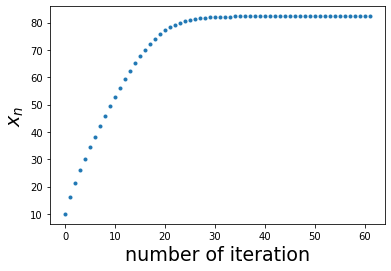

In [12]:
plt.plot(x_list,'.')
plt.xlabel('number of iteration',fontsize=19)
plt.ylabel('$x_n$',fontsize=19)

## Solve for equations

$t'(x)==0$

### Newton Method

### Using packages

### Using Package
1. scipy.optimize.root (numerical)
2. sympy.solve (symbolic)

In [13]:
import scipy
result = scipy.optimize.root(d_total_time,10)
result

    fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.32373723e-10])
       r: array([-0.00529581])
  status: 1
 success: True
       x: array([82.34426932])

In [14]:
result = scipy.optimize.root(lambda x:x**3-1, 0.3)
result

    fjac: array([[-1.]])
     fun: array([2.8643754e-14])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([9.73136305e-09])
       r: array([-2.99999121])
  status: 1
 success: True
       x: array([1.])

## sympy
symbolic calculation

In [15]:
import sympy #symbolic calculation

In [16]:
x = sympy.symbols('x') #create a symbolic variable
x**3-1

x**3 - 1

In [17]:
sympy.solve(x**3-1, x) #it tries to give the symbolic form of the root

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [18]:
d_total_time(x)

0.166666666666667*x/(x**2 + 100)**0.5 + (0.25*x - 25.0)/((100 - x)**2 + 400)**0.5

In [19]:
sympy.solve(d_total_time(x),x) 

[82.3442693164387]

### Newton Method

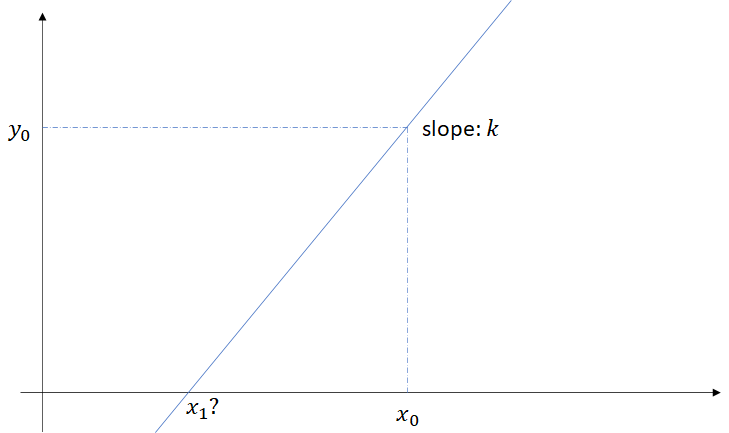

$y(x) = k(x-x_0) +y_0$

solve: $0 = k(x_1 -x_0) + y_0$

$x_1 = x_0 - \frac{y_0}{k} $

$x_1 = x_0 -\frac{y(x_0)}{y'(x_0)}$

for a linear line, the solution is found in one step

what about general function?

https://en.wikipedia.org/wiki/Newton%27s_method#/media/File:NewtonIteration_Ani.gif


$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$

### Newton Method

To find a root of function $f(x)$:

At $x=x_n$, the value of the function is $f(x_n)$ and the slope is $f'(x_n)$

1. picking an initial point $x_0$

2. starting the iteration following the rule:

\begin{equation}
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
\end{equation}

3. Stopping the iteration when $x_{n+1} \approx x_{n}$

Example: $f(x) = x^3 -1 $, $f'(x) = 3 x^2$

In [64]:
def Newton_method(f,df, x): 
    x_list=[x]
    for i_step in range(100):
        x_new = x - f(x)/df(x)
        x_list.append(x_new)
        if abs(x_new -x )<1e-5:
            return x_list
        x = x_new
        i_step = i_step +1
    x_list.append(None)
    return x_list

In [21]:
import numpy as np

Example: $f(x) = x^3 -1 $, $f'(x) = 3 x^2$

In [81]:
x_list = Newton_method(lambda x:x**3-1, lambda x: 3*x**2, 2)

In [82]:
x_list

[2,
 1.4166666666666665,
 1.1105344098423684,
 1.0106367684045563,
 1.0001115573039492,
 1.0000000124431812,
 1.0000000000000002]

### Newton Fractal

Again consider the function $f(z) = z^3 -1$ but in the complex plane: $z = x + iy$

It has __three__ roots

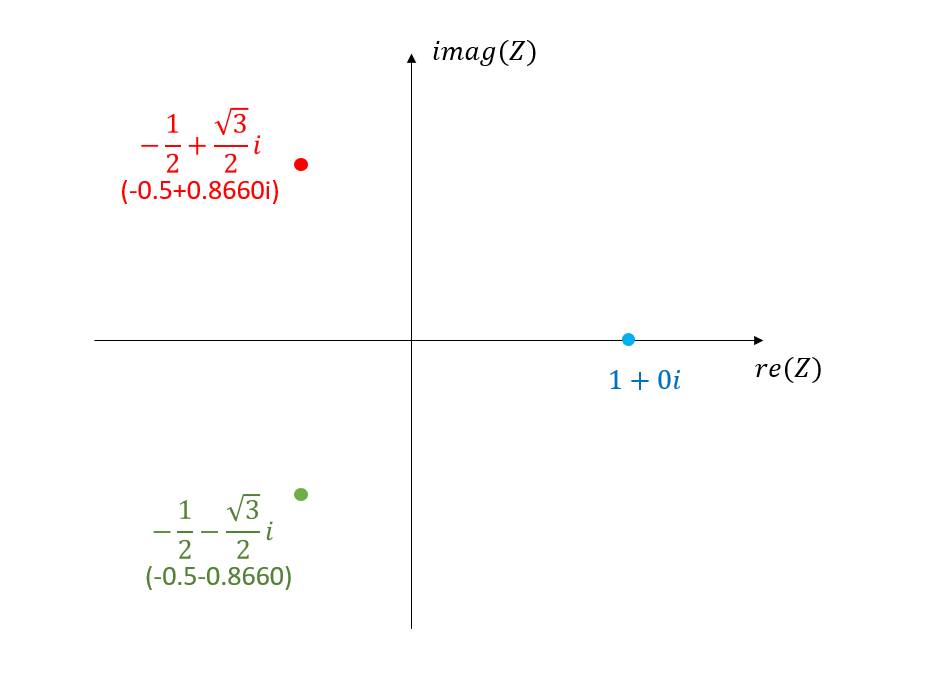
Picking an initial point $z_0$, it will converge to one of the root. But which one? Based on the converged result, color each point on the plane.

In [24]:
import numpy as np

In [77]:
# Newton Fractal
x_min = -1
x_max = +1
y_min = -1
y_max = +1
#the range in the complex plane
f = lambda x:x**3-1
df = lambda x:3*x**2

dim=1000; #divide the complex plane to 200*200 small square

root =[1, -1/2-np.sqrt(3)/2*1j, -1/2 + np.sqrt(3)/2*1j] #3 roots

x = np.linspace(x_min, x_max, dim) #real part, 1000   points from x_min to x_max
y = np.linspace(y_min, y_max, dim) #imaginary part, 1000 points from y_min to y_max

result = np.zeros((dim,dim),dtype=complex)  #the dim*dim matrix to store the result

for i_x in range(dim): #going through all real parts
    for i_y in range(dim): #going trhough all imaginary parts
        z = x[i_x] + 1j*y[i_y] #the complex number at the point
        z
        z_list = Newton_method(f, df, z) #newton iteration
        result[i_y, i_x] = z_list[-1]
        
#         for i_root in range(4):
#             if abs(z_list[-1] - root[i_root])<1e-5:
#                 result[i_y,i_x] = i_root+1 # label the point
#                 break
        

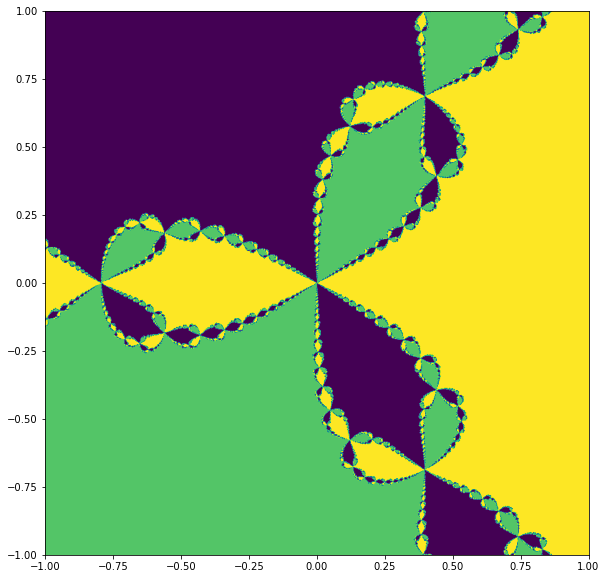

In [80]:
plt.figure(figsize = (10,10))
plt.imshow(np.real(result)+np.imag(result), extent=[x.min(), x.max(), y.min(), y.max()])


# Other cool examples

[chaos in magnetic pendulum] https://www.youtube.com/watch?v=oVNr5wPHuTs

[Three Body Problem] https://www.youtube.com/watch?v=mm3I4m8YsnM

## Summary
### Gradient descend
1. Picking an starting point $x_0$:
2. starting the iteration (go down the hill)

\begin{equation}
x_{n+1} = x_{n} - \gamma f'(x_n)
\end{equation}

3. stopping the iteration when $x_{n+1} \approx x_{n}$

### Newton Method

To find a root of function $f(x)$:

At $x=x_n$, the value of the function is $f(x_n)$ and the slope is $f'(x_n)$

1. picking an initial point $x_0$

2. starting the iteration following the rule:

\begin{equation}
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
\end{equation}

3. Stopping the iteration when $x_{n+1} \approx x_{n}$

### Motion

\begin{equation}
\begin{aligned}
 t_{n+1} &= t_{n} + dt \\
 v_{n+1} &= v_{n} + a_{n}dt \\
 x_{n+1} &= x_{n+1} + v_{n+1} dt \\
 a_{n+1} &= f_a (x_{n+1}, v_{n+1}, t_{n+1})
\end{aligned}
\end{equation}

Common structure:

The quantities at step $n+1$ depend on step $n$ according to some simple rules.
    

## simple rules leading to complex pattern

\begin{equation}
x_{n+1} = x_{n} - \frac{x^3-1}{3x^2}
\end{equation}


__Is there such a simple rule that leads to all the complex phenomena of our universe ?__

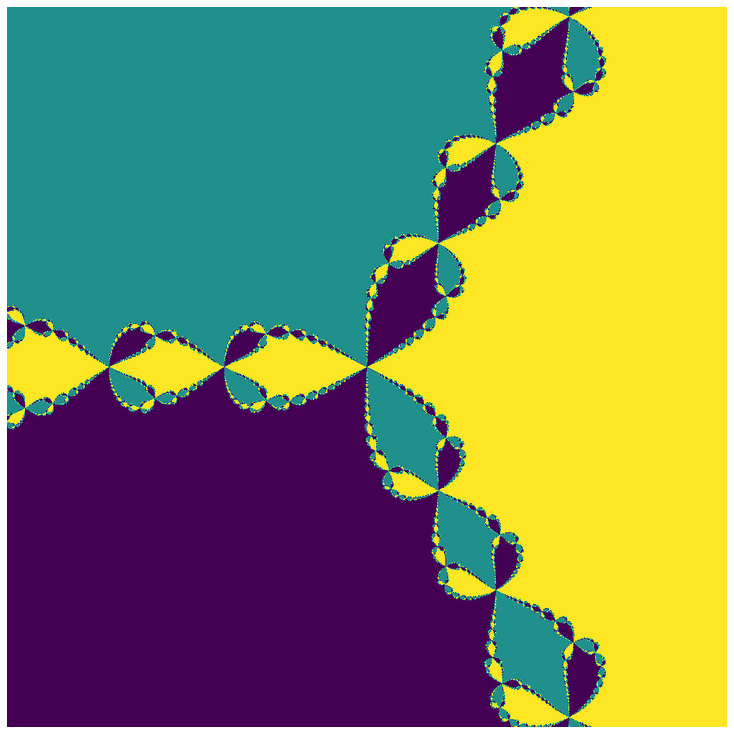